<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [72]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-08 04:07:39--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.7’

survey-results-publ 100%[===================>] 201.62M  67.6MB/s    in 3.0s    

2025-07-08 04:07:43 (67.6 MB/s) - ‘survey-results-public.sqlite.7’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [73]:
!pip install pandas

In [74]:
!pip install matplotlib

In [75]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [76]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [77]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [78]:
!pip install seaborn  
import seaborn as sns 
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


Q1 (25th percentile): $50,000.00
Median (50th percentile): $85,000.00
Q3 (75th percentile): $144,000.00


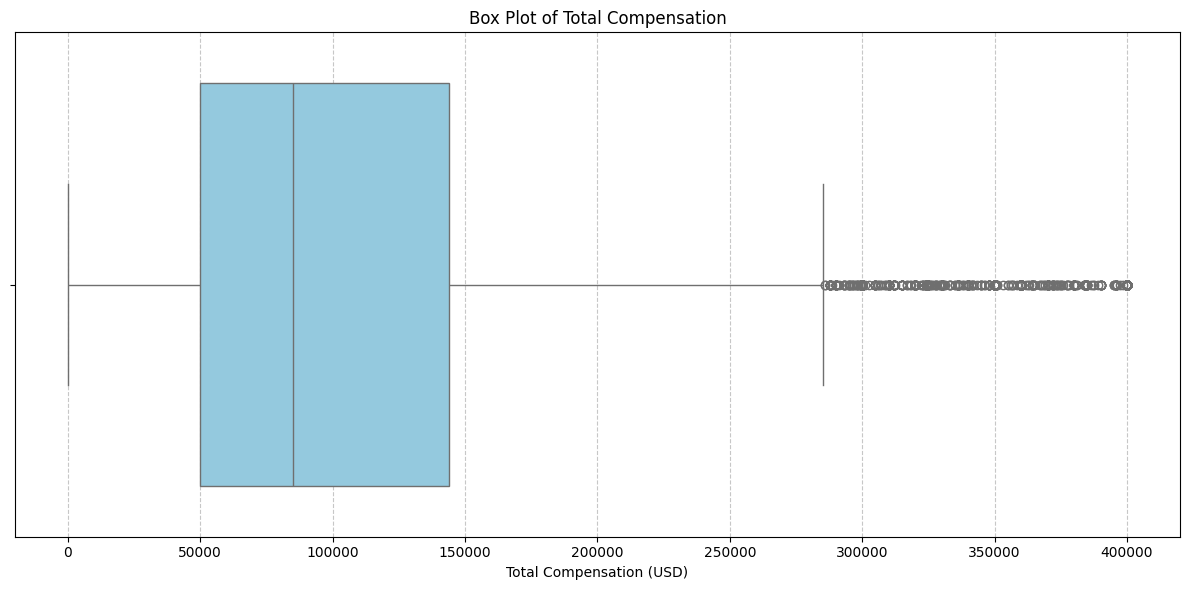

In [79]:
# your code goes here

QUERY ="""
SELECT CompTotal FROM main  
""" 
# Read and clean data
df = pd.read_sql_query(QUERY, conn)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])  # Important: assign back to df

# Filter top 80%
upper_limit = df['CompTotal'].quantile(0.80)
df_filtered = df[df['CompTotal'] <= upper_limit]

# Calculate stats from filtered data
comp = df_filtered['CompTotal']
q1 = comp.quantile(0.25)
median = comp.median()
q3 = comp.quantile(0.75)

# Print the results
print(f"Q1 (25th percentile): ${q1:,.2f}")
print(f"Median (50th percentile): ${median:,.2f}")
print(f"Q3 (75th percentile): ${q3:,.2f}")

# Plot from the same filtered data
plt.figure(figsize=(12,6))
sns.boxplot(data=df_filtered, x='CompTotal', color='skyblue')
plt.title('Box Plot of Total Compensation')
plt.xlabel('Total Compensation (USD)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']
21.0


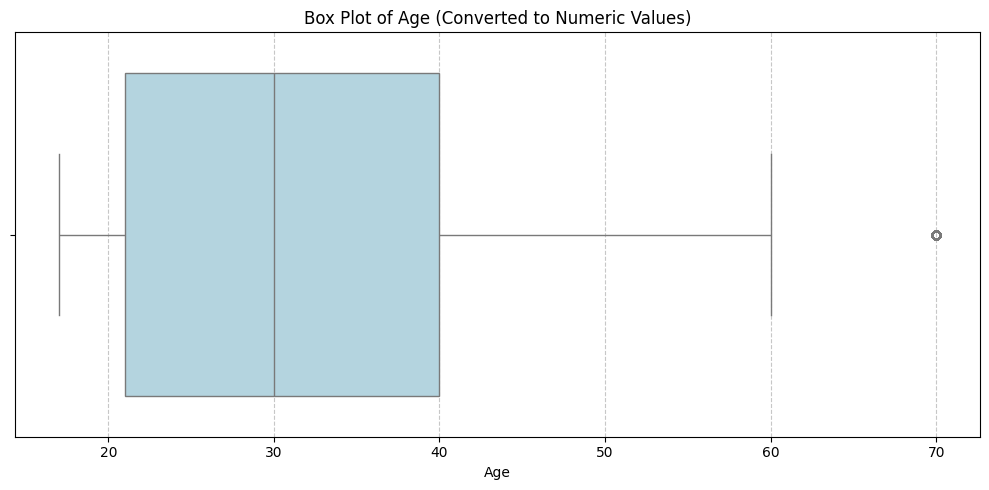

In [80]:
# your code goes here
QUERY = "SELECT Age FROM main" 
df = pd.read_sql_query(QUERY, conn)
print(df['Age'].unique()) 
age_map ={
    'Under 18 years old':17,
    '18-24 years old': 21,
    '25-34 years old': 30, 
    '35-44 years old': 40, 
    '45-54 years old': 50, 
    '55-64 years old': 60, 
    '65 years or older': 70,
    'Prefer not to say': None 
}

df['AgeMapped'] = df['Age'].map(age_map)
df =df.dropna(subset =['AgeMapped'])  
df['AgeMapped'] = df['AgeMapped'].astype(int)  
print(df['AgeMapped'].quantile(0.25))

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['AgeMapped'], color='lightblue')

plt.title('Box Plot of Age (Converted to Numeric Values)')
plt.xlabel('Age')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
    

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


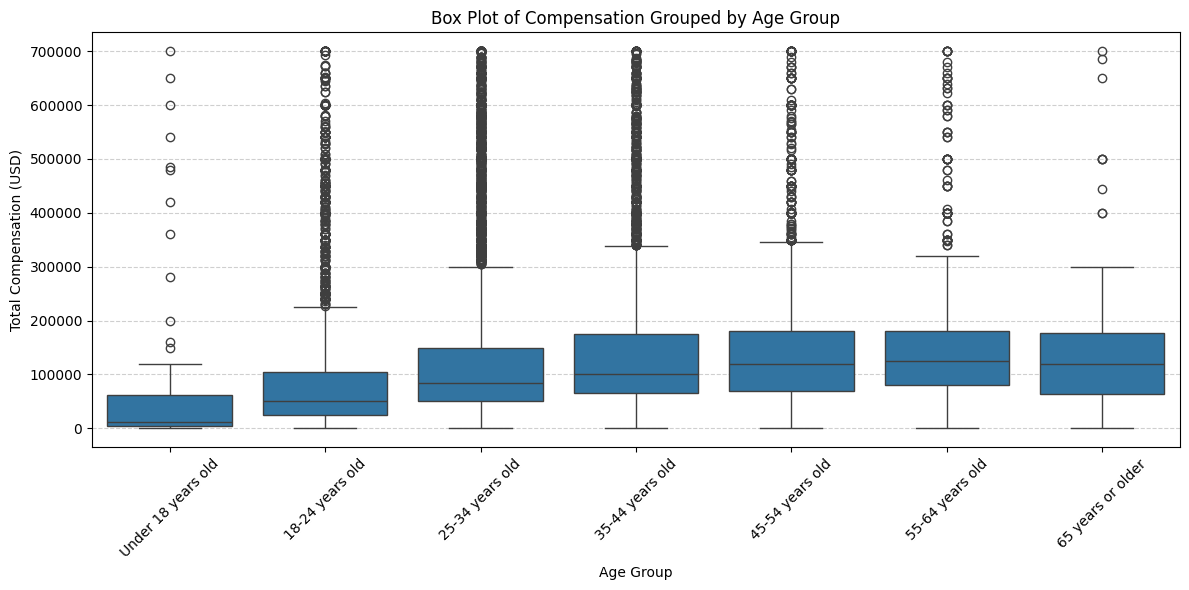

In [81]:
# your code goes here
QUERY = "select CompTotal , age from main" 
df = pd.read_sql_query(QUERY, conn)

df['CompTotal'] =pd.to_numeric(df['CompTotal'], errors ='coerce') 
df =df.dropna(subset =['Age', 'CompTotal'])
df =df[df['CompTotal'] <= df['CompTotal'].quantile(0.85)]
age_order =[
    'Under 18 years old', 
    '18-24 years old', 
    '25-34 years old', 
    '35-44 years old', 
    '45-54 years old', 
    '55-64 years old', 
    '65 years or older'
]
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age', y='CompTotal', order=age_order)

# Step 6: Styling
plt.title('Box Plot of Compensation Grouped by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


[   nan   0.    25.    30.    60.   100.    20.    50.    15.    10.
   5.    80.     8.    65.    90.    75.    35.    40.    33.    70.
  17.     7.    12.    13.     9.    21.    18.    95.     2.    45.
  34.    16.    78.    85.     1.    14.    31.    11.    23.    28.
  81.     6.25   6.    55.     3.    22.    42.     4.    89.    99.
  12.5   36.    27.    24.    19.    87.    88.    29.    33.33  33.3
  37.    39.    77.    68.    26.    98.    32.    66.    57.    82.
  94.    61.    43.    69.    76.    73.    17.5   46.    49.    52.
  97.    96.    67.    91.    86.    56.    41.    74.    51.    48.
  44.    64.    54.    63.  ]


/tmp/ipykernel_301/3597691439.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


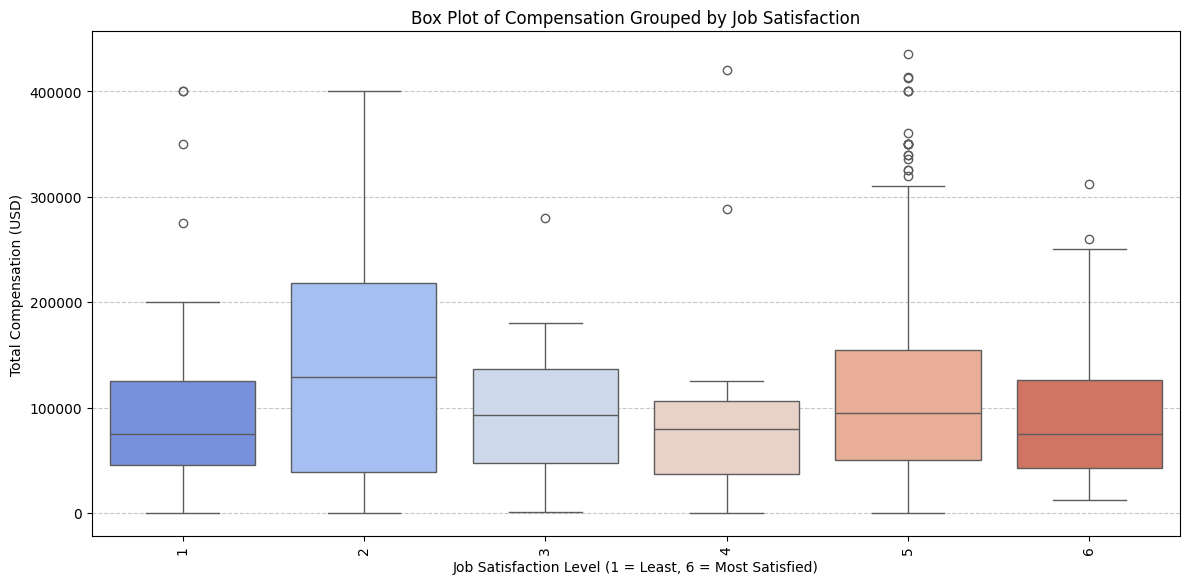

In [82]:
# your code goes here
QUERY = "select CompTotal, JobSatPoints_6 from main" 
df = pd.read_sql_query(QUERY, conn)
print(df['JobSatPoints_6'].unique())

df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors ='coerce')
df = df.dropna(subset = ['CompTotal', 'JobSatPoints_6'])
df['JobSatPoints_6'] = df['JobSatPoints_6'].astype(int)

upper_limit = df['CompTotal'].quantile(0.80) 
df_filtered = df[df['CompTotal'] <= upper_limit] 

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_filtered,
    x='JobSatPoints_6',
    y='CompTotal',
    palette='coolwarm',
    order=[1, 2, 3, 4, 5, 6]
)


plt.title('Box Plot of Compensation Grouped by Job Satisfaction')
plt.xlabel('Job Satisfaction Level (1 = Least, 6 = Most Satisfied)')
plt.ylabel('Total Compensation (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation= 90)
plt.show()






### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


/tmp/ipykernel_301/1290944381.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5['cc'] = pd.to_numeric(df_top5['cc'], errors ='coerce')
/tmp/ipykernel_301/1290944381.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top5, x='DevType', y='cc', palette='pastel')


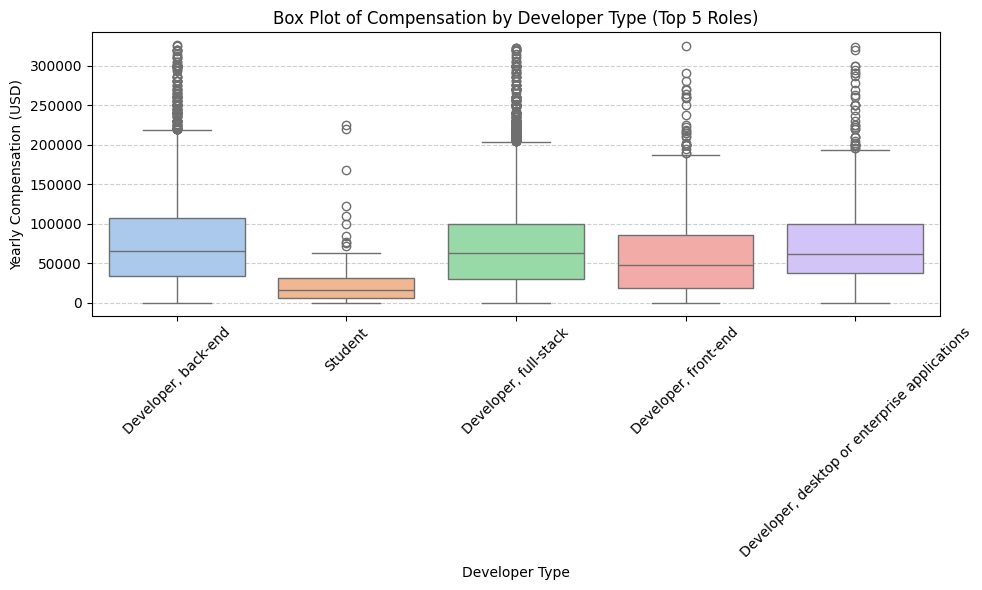

In [83]:
# your code goes here
df = pd.read_sql("select DevType, ConvertedCompYearly as cc from main", conn) 
df.dropna(subset =['DevType', 'cc']) 
df['DevType'] = df['DevType'].str.split(';') 
df = df.explode('DevType')  

top_5dev = df['DevType'].value_counts().nlargest(5).index.tolist() 
df_top5 = df[df['DevType'].isin(top_5dev)] 

df_top5['cc'] = pd.to_numeric(df_top5['cc'], errors ='coerce') 
df_top5 = df_top5[df_top5['cc'] <= df_top5['cc'].quantile(0.99)]  

plt.figure(figsize=(10,6))
sns.boxplot(data=df_top5, x='DevType', y='cc', palette='pastel')
plt.title('Box Plot of Compensation by Developer Type (Top 5 Roles)')
plt.xlabel('Developer Type')
plt.ylabel('Yearly Compensation (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


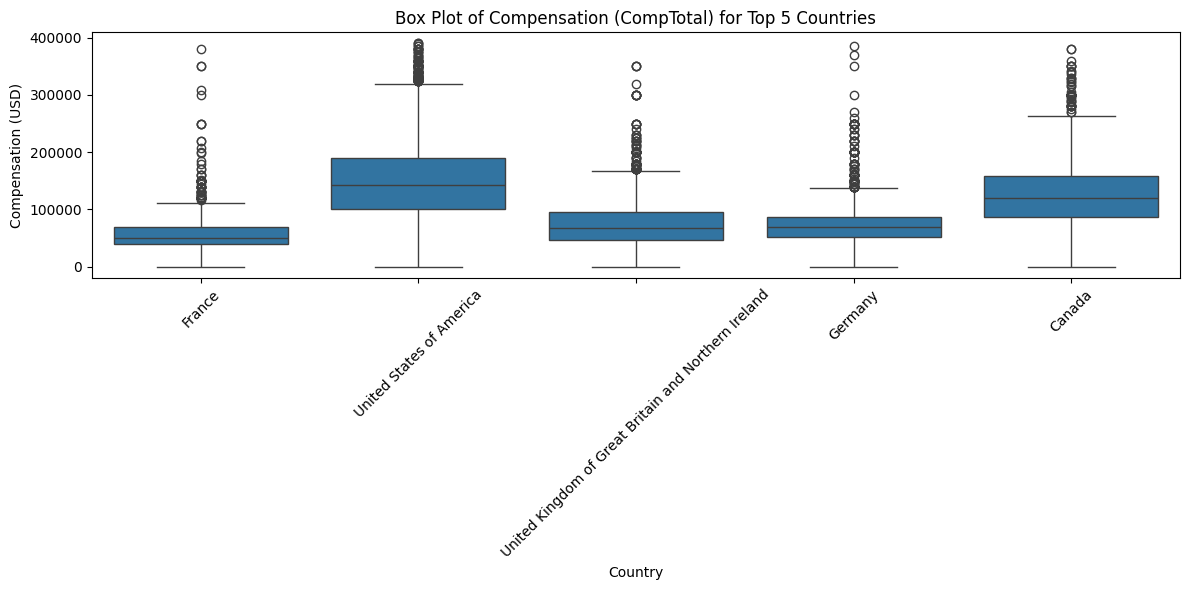

In [84]:
# your code goes here
df = pd.read_sql(" Select Country, CompTotal from main", conn) 
df.dropna(subset =['Country', 'CompTotal'] ) 
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.80)]
top_5 = df['Country'].value_counts().head(5).index
df_top = df[df['Country'].isin(top_5)] 

plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='CompTotal', data=df_top)
plt.title('Box Plot of Compensation (CompTotal) for Top 5 Countries')
plt.ylabel('Compensation (USD)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_301/1876129480.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


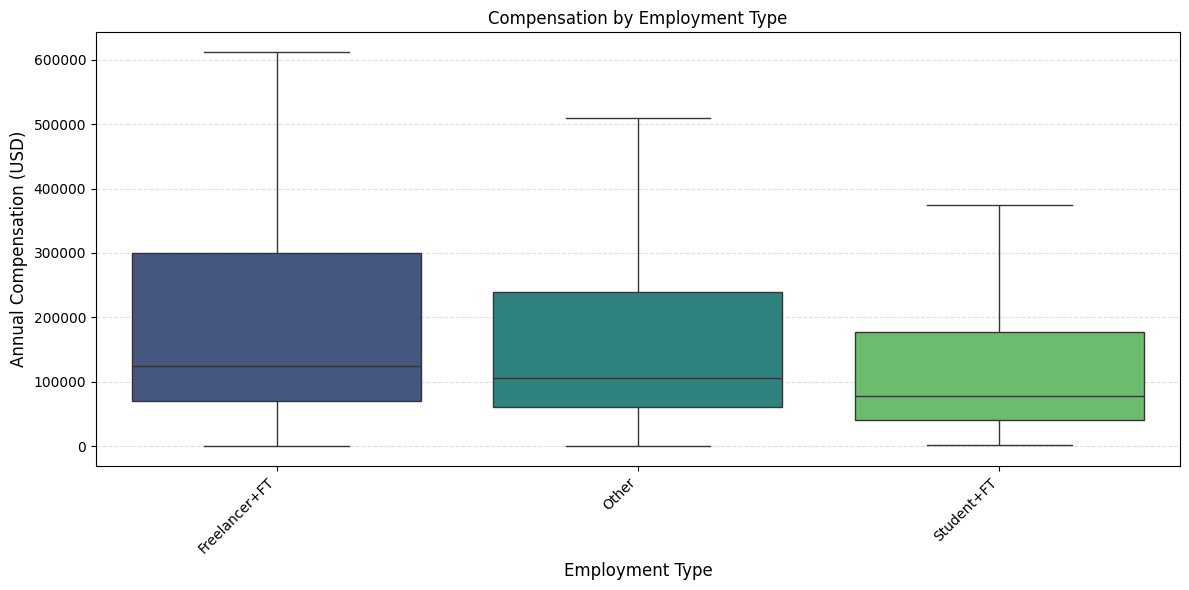

In [98]:


# Query data
QUERY = "SELECT CompTotal, Employment FROM main" 
df = pd.read_sql_query(QUERY, conn)

# Simplified mapping only for the shown employment types
employment_map = {
    'Employed, full-time;Independent contractor, freelancer, or self-employed': 'Freelancer+FT',
    'Employed, full-time;Student, part-time': 'Student+FT',
    'Employed, Part-time': 'Part-time',
    # Add any other employment types that appear in your visualization
}

# Apply the mapping
df['Employment_Simplified'] = df['Employment'].map(employment_map).fillna('Other')
df_clean = df[['Employment_Simplified', 'CompTotal']].dropna()

# Get top 5 employment types by count
top_n = 5
top_employment = df_clean['Employment_Simplified'].value_counts().nlargest(top_n).index

# Filter to only include top employment types
df_top = df_clean[df_clean['Employment_Simplified'].isin(top_employment)].copy()

# 
upper_limit = df_top['CompTotal'].quantile(0.99)
df_top = df_top[df_top['CompTotal'] <= upper_limit]

# Remove zero/negative compensation
df_top = df_top[df_top['CompTotal'] > 0]

# Calculate order by median compensation
order = df_top.groupby('Employment_Simplified')['CompTotal'].median().sort_values(ascending=False).index

# Create visualization
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_top,
    x='Employment_Simplified',
    y='CompTotal',
    palette='viridis',
    order=order,
    showfliers=False
)

plt.title('Compensation by Employment Type')  # Changed from 'hdhd'
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Annual Compensation (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


/tmp/ipykernel_301/475026616.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['ExperienceGroup'] = pd.cut(df_clean['YearsCodePro'], bins=bins, labels=labels)
/tmp/ipykernel_301/475026616.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


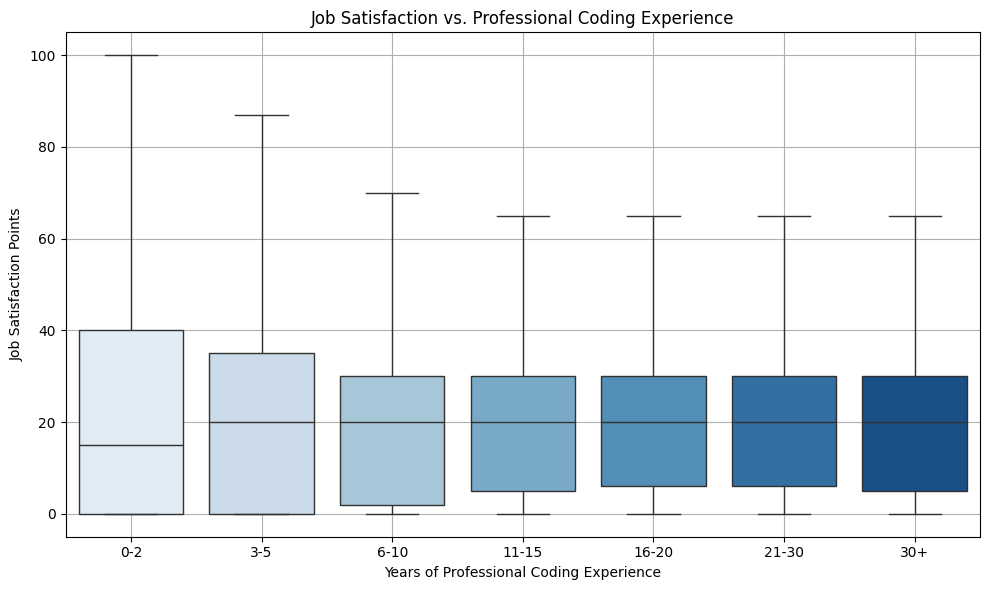

In [110]:
QUERY = "SELECT YearsCodePro, JobSatPoints_6 FROM main" 
df = pd.read_sql_query(QUERY, conn)
df = df[['YearsCodePro', 'JobSatPoints_6']].dropna()

# Convert to numeric and clean
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce') 
df_clean = df.dropna()

# Create experience groups
bins = [0, 2, 5, 10, 15, 20, 30, 50]
labels = ['0-2', '3-5', '6-10', '11-15', '16-20', '21-30', '30+']
df_clean['ExperienceGroup'] = pd.cut(df_clean['YearsCodePro'], bins=bins, labels=labels) 

# Create boxplot - using ExperienceGroup for x-axis
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_clean,
    x='ExperienceGroup',  # Changed from YearsCodePro to ExperienceGroup
    y='JobSatPoints_6',
    order=labels,
    showfliers=False,
    palette='Blues'
)

plt.title('Job Satisfaction vs. Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Points')
plt.grid(True)
plt.tight_layout()
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
